✈️ MODÉLISATION - SATISFACTION PASSAGERS AÉRIENS

📁 SECTION 1: CHARGEMENT DES DONNÉES PRÉTRAITÉES
✅ Données chargées avec succès!

📊 Dimensions:
   X_train: (103904, 20)
   y_train: (103904,)
   X_test: (25976, 20)
   y_test: (25976,)

🎯 Distribution des classes (y_train):
   Classe 0 (neutral or dissatisfied): 58879 (56.7%)
   Classe 1 (satisfied): 45025 (43.3%)

🎯 SECTION 2: BASELINE - RÉGRESSION LOGISTIQUE
🔬 Entraînement du modèle de baseline (Régression Logistique)...

📊 PERFORMANCES - RÉGRESSION LOGISTIQUE (Baseline):
   ⏱️  Temps d'entraînement: 0.96s
   📈 Accuracy: 0.8661
   🎯 Precision: 0.8425
   🔄 Recall: 0.8548
   ⚖️  F1-Score: 0.8486
   📊 ROC-AUC: 0.9259

📋 RAPPORT DE CLASSIFICATION:
                      precision    recall  f1-score   support

neutral/dissatisfied       0.89      0.87      0.88     14573
           satisfied       0.84      0.85      0.85     11403

            accuracy                           0.87     25976
           macro avg       0.86      0.86     

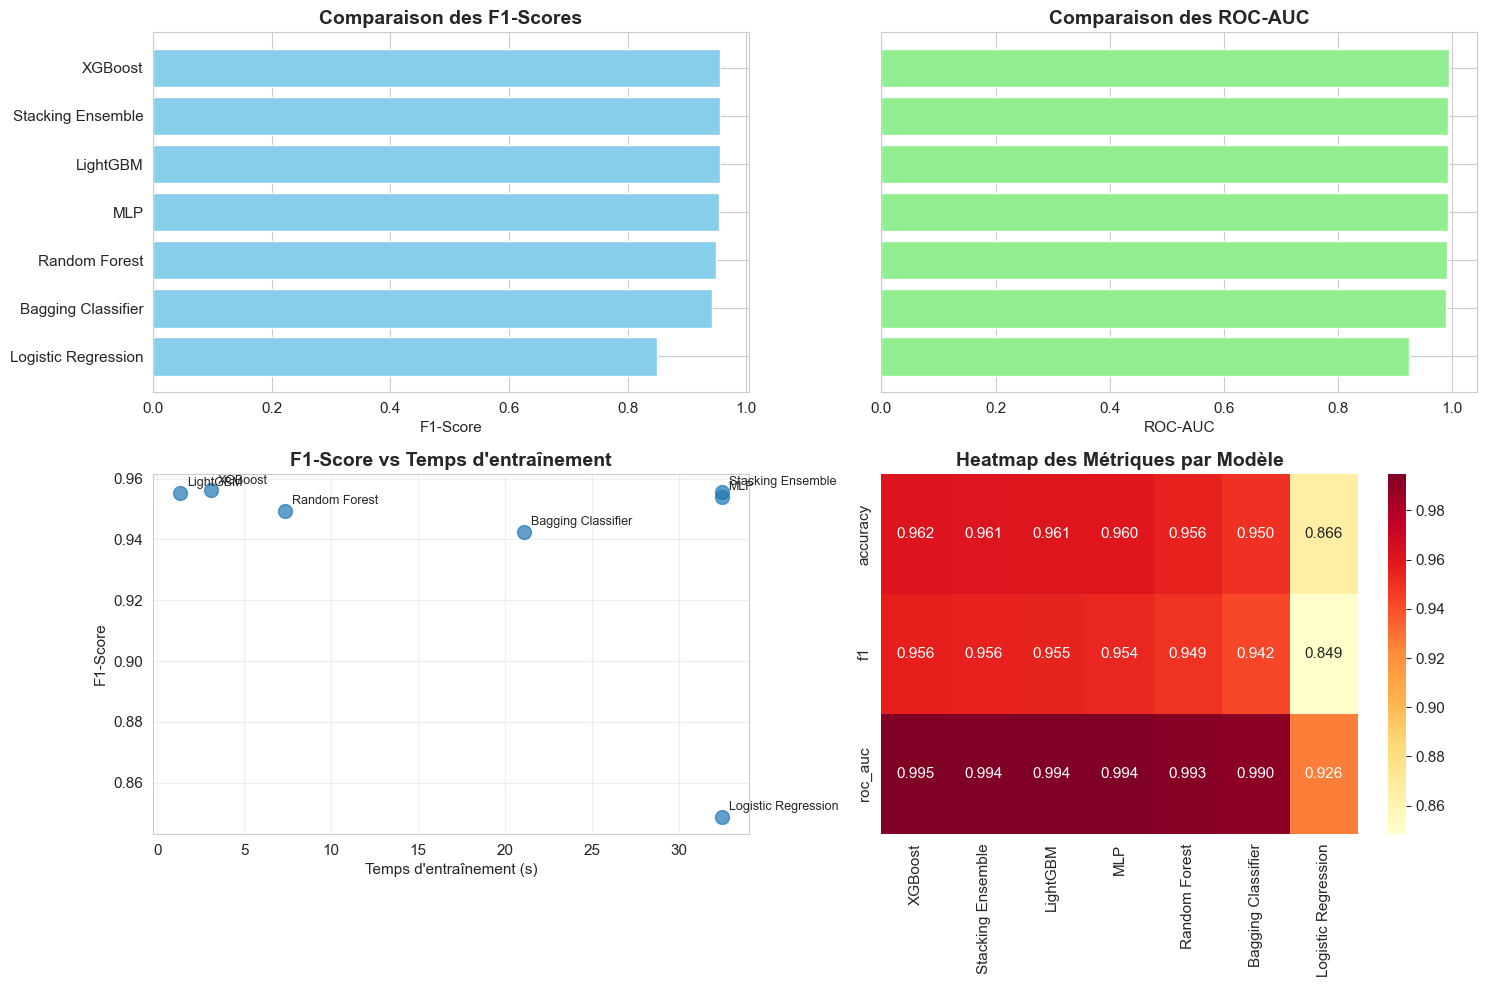


💾 Graphique sauvegardé: model_comparison.png

🔍 SECTION 8: ANALYSE DÉTAILLÉE DU MEILLEUR MODÈLE

🏆 MEILLEUR MODÈLE: XGBoost
   F1-Score: 0.9561
   ROC-AUC: 0.9947

📋 MATRICE DE CONFUSION:


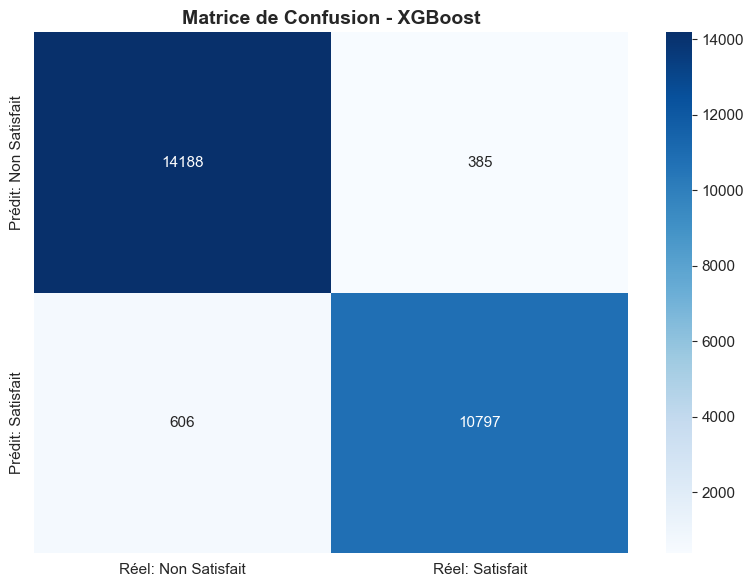


                       Réel: Non Satisfait  Réel: Satisfait
Prédit: Non Satisfait                14188              385
Prédit: Satisfait                      606            10797

📈 COURBE ROC:


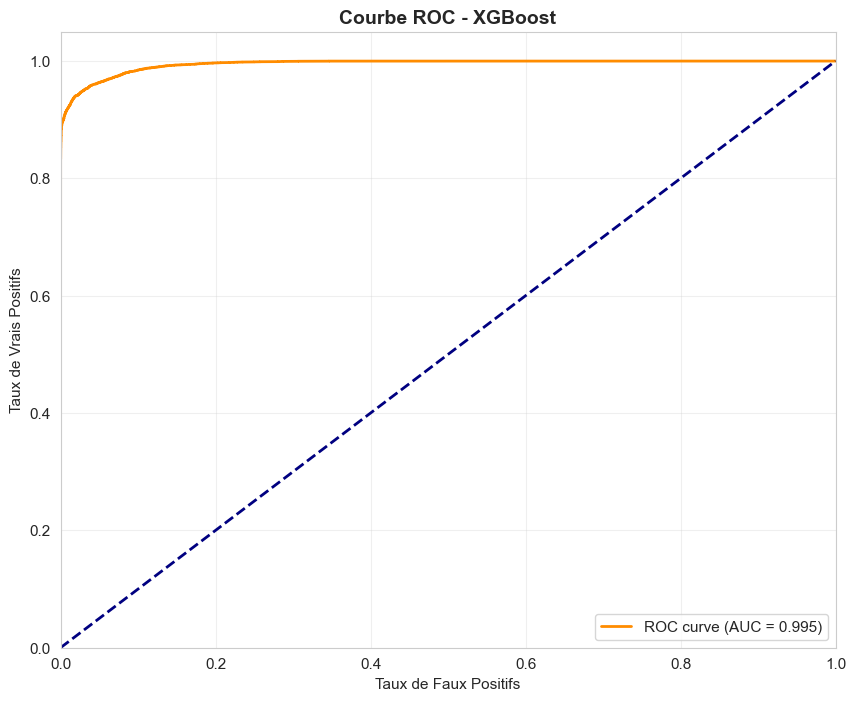


🎯 COURBE PRECISION-RECALL:


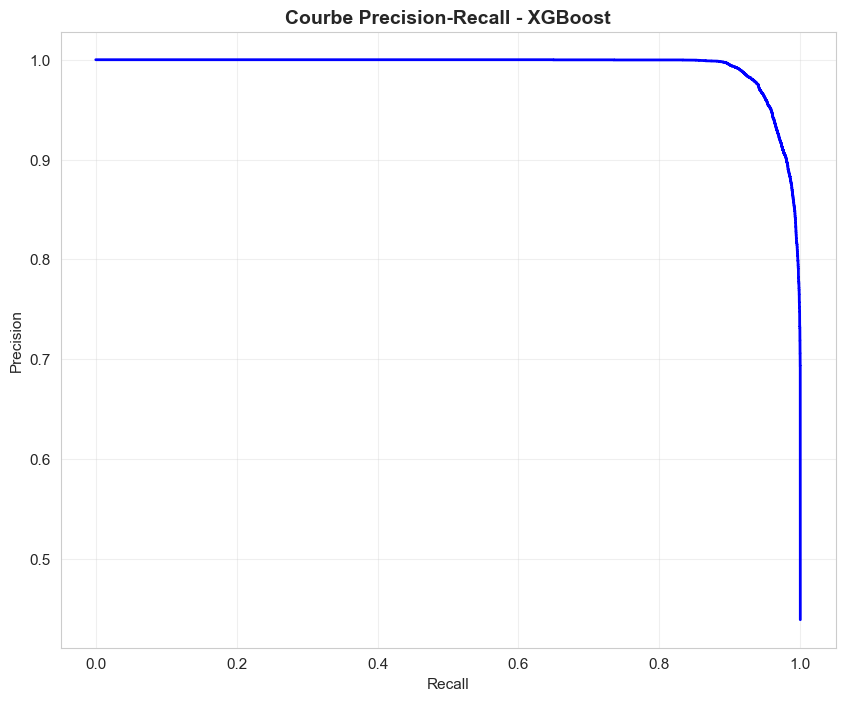


🎯 SECTION 9: IMPORTANCE DES FEATURES

🔝 TOP 10 DES FEATURES LES PLUS IMPORTANTES:
--------------------------------------------------
 3. Type of Travel                 : 0.2739
 8. Online boarding                : 0.2168
 5. Inflight wifi service          : 0.1288
 1. Customer Type                  : 0.1125
10. Inflight entertainment         : 0.0588
 9. Seat comfort                   : 0.0412
16. Cleanliness                    : 0.0238
17. Class_Eco                      : 0.0215
14. Checkin service                : 0.0203
12. Leg room service               : 0.0164


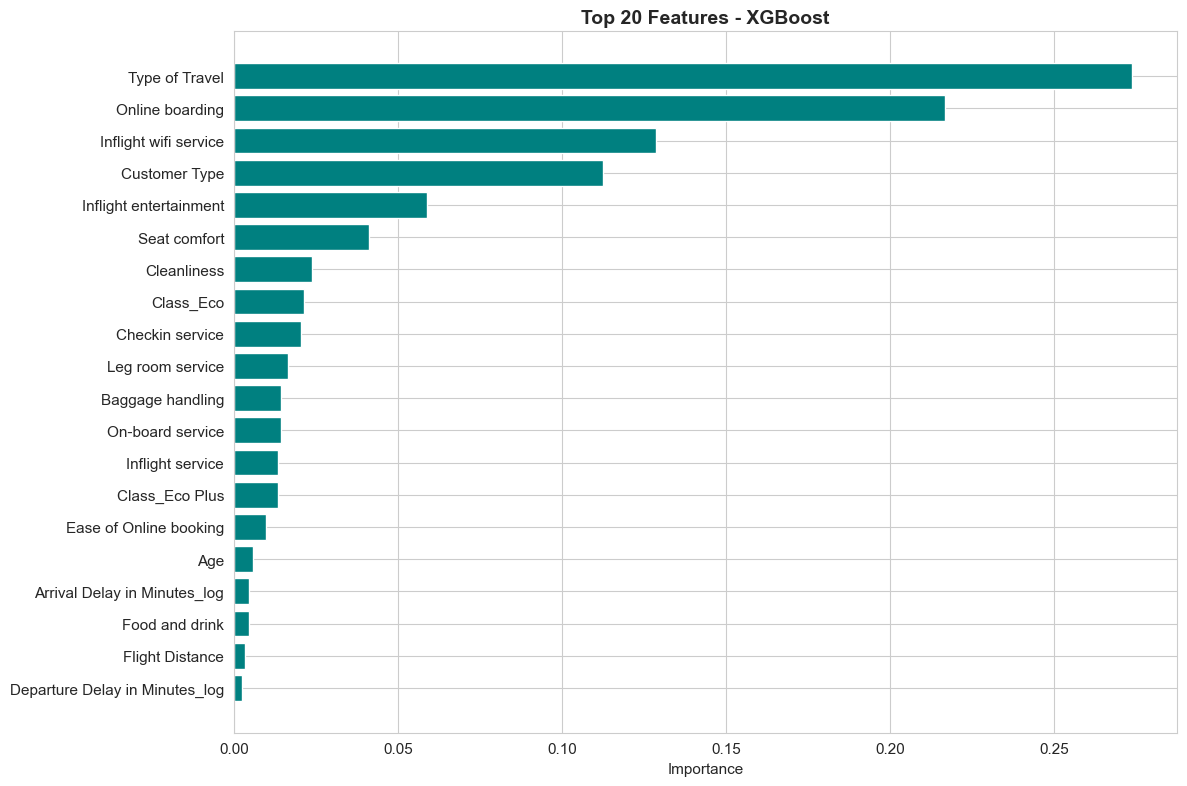


💾 Graphique sauvegardé: feature_importance.png

💾 SECTION 10: SAUVEGARDE DE TOUS LES MODÈLES

📁 Dossier de sauvegarde: models/

🔄 Sauvegarde des modèles en cours...
------------------------------------------------------------
✅ Logistic_Regression       → models\Logistic_Regression.pkl (0.00 MB)
✅ Random_Forest             → models\Random_Forest.pkl (25.21 MB)
✅ Bagging_Classifier        → models\Bagging_Classifier.pkl (2.78 MB)
✅ XGBoost                   → models\XGBoost.pkl (0.79 MB)
✅ LightGBM                  → models\LightGBM.pkl (0.34 MB)
✅ MLP                       → models\MLP.pkl (0.09 MB)
✅ Stacking_Ensemble         → models\Stacking_Ensemble.pkl (4.42 MB)

🏆 MEILLEUR MODÈLE: models\BEST_MODEL_XGBoost.pkl

📊 Tableau comparatif: models\model_results_comparison.csv
📋 Métadonnées: models\models_metadata.pkl

📦 RÉCAPITULATIF DES MODÈLES SAUVEGARDÉS:
----------------------------------------------------------------------
         model_name                      file_path  file_si

In [1]:
# -*- coding: utf-8 -*-
"""Airline_Passenger_Satisfaction_Modeling.ipynb

Modélisation - Satisfaction Passagers Aériens
Test de modèles: Bagging, Boosting, Stacking et MLP
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           roc_auc_score, confusion_matrix, classification_report,
                           roc_curve, auc, precision_recall_curve)
from sklearn.preprocessing import label_binarize
import warnings
warnings.filterwarnings('ignore')
import joblib
import time

# Configuration visualisation
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'

print("="*80)
print("✈️ MODÉLISATION - SATISFACTION PASSAGERS AÉRIENS")
print("="*80)

# ============================================================================
# 📁 SECTION 1: CHARGEMENT DES DONNÉES PRÉTRAITÉES
# ============================================================================

print("\n" + "="*80)
print("📁 SECTION 1: CHARGEMENT DES DONNÉES PRÉTRAITÉES")
print("="*80)

# Charger les données prétraitées
data_path = 'processed/'

X_train = pd.read_csv(f'{data_path}X_train_processed.csv')
y_train = pd.read_csv(f'{data_path}y_train_processed.csv').squeeze()  # Convertir en Series
X_test = pd.read_csv(f'{data_path}X_test_processed.csv')

# Vérifier si y_test existe
try:
    y_test = pd.read_csv(f'{data_path}y_test_processed.csv').squeeze()
    has_test_target = True
except:
    y_test = None
    has_test_target = False

# Charger les objets de preprocessing
preprocessing_objects = joblib.load(f'{data_path}preprocessing_objects.pkl')

print("✅ Données chargées avec succès!")
print(f"\n📊 Dimensions:")
print(f"   X_train: {X_train.shape}")
print(f"   y_train: {y_train.shape}")
if has_test_target:
    print(f"   X_test: {X_test.shape}")
    print(f"   y_test: {y_test.shape}")

# Informations sur les classes
print(f"\n🎯 Distribution des classes (y_train):")
class_counts = y_train.value_counts()
class_percent = y_train.value_counts(normalize=True) * 100

for cls, count in class_counts.items():
    pct = class_percent[cls]
    label = preprocessing_objects['target_encoder'].inverse_transform([cls])[0]
    print(f"   Classe {cls} ({label}): {count} ({pct:.1f}%)")

# ============================================================================
# 🎯 SECTION 2: BASELINE - RÉGRESSION LOGISTIQUE
# ============================================================================

print("\n" + "="*80)
print("🎯 SECTION 2: BASELINE - RÉGRESSION LOGISTIQUE")
print("="*80)

from sklearn.linear_model import LogisticRegression

# Créer un ensemble de validation si pas de test disponible
if not has_test_target:
    X_train_final, X_val, y_train_final, y_val = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
    )
else:
    X_train_final, y_train_final = X_train, y_train
    X_val, y_val = X_test, y_test

print("🔬 Entraînement du modèle de baseline (Régression Logistique)...")

# Modèle avec class_weight pour gérer le déséquilibre
lr_model = LogisticRegression(
    random_state=42,
    class_weight='balanced',
    max_iter=1000,
    solver='liblinear'
)

start_time = time.time()
lr_model.fit(X_train_final, y_train_final)
training_time = time.time() - start_time

# Prédictions
y_pred_lr = lr_model.predict(X_val)
y_pred_proba_lr = lr_model.predict_proba(X_val)[:, 1]

# Évaluation
accuracy_lr = accuracy_score(y_val, y_pred_lr)
precision_lr = precision_score(y_val, y_pred_lr)
recall_lr = recall_score(y_val, y_pred_lr)
f1_lr = f1_score(y_val, y_pred_lr)
roc_auc_lr = roc_auc_score(y_val, y_pred_proba_lr)

print("\n📊 PERFORMANCES - RÉGRESSION LOGISTIQUE (Baseline):")
print(f"   ⏱️  Temps d'entraînement: {training_time:.2f}s")
print(f"   📈 Accuracy: {accuracy_lr:.4f}")
print(f"   🎯 Precision: {precision_lr:.4f}")
print(f"   🔄 Recall: {recall_lr:.4f}")
print(f"   ⚖️  F1-Score: {f1_lr:.4f}")
print(f"   📊 ROC-AUC: {roc_auc_lr:.4f}")

# Rapport de classification
print("\n📋 RAPPORT DE CLASSIFICATION:")
print(classification_report(y_val, y_pred_lr,
                           target_names=['neutral/dissatisfied', 'satisfied']))

# ============================================================================
# 🌳 SECTION 3: MODÈLES DE BAGGING
# ============================================================================

print("\n" + "="*80)
print("🌳 SECTION 3: MODÈLES DE BAGGING")
print("="*80)

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

print("🔬 Entraînement des modèles de Bagging...")

# 3.1 Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=4,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# 3.2 Bagging avec arbres de décision
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=10, class_weight='balanced'),
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)

# Entraîner les modèles
models_bagging = {
    'Random Forest': rf_model,
    'Bagging Classifier': bagging_model
}

results_bagging = {}

for name, model in models_bagging.items():
    print(f"\n🎯 Entraînement: {name}")
    start_time = time.time()
    model.fit(X_train_final, y_train_final)
    training_time = time.time() - start_time

    # Prédictions
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]

    # Métriques
    results = {
        'accuracy': accuracy_score(y_val, y_pred),
        'precision': precision_score(y_val, y_pred),
        'recall': recall_score(y_val, y_pred),
        'f1': f1_score(y_val, y_pred),
        'roc_auc': roc_auc_score(y_val, y_pred_proba),
        'training_time': training_time
    }

    results_bagging[name] = results

    print(f"   ⏱️  Temps: {training_time:.2f}s")
    print(f"   📈 F1-Score: {results['f1']:.4f}")
    print(f"   📊 ROC-AUC: {results['roc_auc']:.4f}")

# Comparaison
print("\n📊 COMPARAISON DES MODÈLES DE BAGGING:")
print("-"*60)
print(f"{'Modèle':<20} {'Accuracy':<10} {'F1-Score':<10} {'ROC-AUC':<10} {'Temps(s)':<10}")
print("-"*60)

for name, results in results_bagging.items():
    print(f"{name:<20} {results['accuracy']:<10.4f} {results['f1']:<10.4f} "
          f"{results['roc_auc']:<10.4f} {results['training_time']:<10.2f}")

# ============================================================================
# 🚀 SECTION 4: MODÈLES DE BOOSTING
# ============================================================================

print("\n" + "="*80)
print("🚀 SECTION 4: MODÈLES DE BOOSTING")
print("="*80)

try:
    import xgboost as xgb
    import lightgbm as lgb
    HAS_XGB = True
except:
    print("⚠️  XGBoost ou LightGBM non installés. Installation...")
    !pip install xgboost lightgbm -q
    import xgboost as xgb
    import lightgbm as lgb
    HAS_XGB = True

print("🔬 Entraînement des modèles de Boosting...")

# 4.1 XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=len(y_train_final[y_train_final==0])/len(y_train_final[y_train_final==1])  # Pour déséquilibre
)

# 4.2 LightGBM
lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    max_depth=7,
    learning_rate=0.1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

# Entraîner les modèles
models_boosting = {
    'XGBoost': xgb_model,
    'LightGBM': lgb_model
}

results_boosting = {}

for name, model in models_boosting.items():
    print(f"\n🎯 Entraînement: {name}")
    start_time = time.time()
    model.fit(X_train_final, y_train_final)
    training_time = time.time() - start_time

    # Prédictions
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]

    # Métriques
    results = {
        'accuracy': accuracy_score(y_val, y_pred),
        'precision': precision_score(y_val, y_pred),
        'recall': recall_score(y_val, y_pred),
        'f1': f1_score(y_val, y_pred),
        'roc_auc': roc_auc_score(y_val, y_pred_proba),
        'training_time': training_time
    }

    results_boosting[name] = results

    print(f"   ⏱️  Temps: {training_time:.2f}s")
    print(f"   📈 F1-Score: {results['f1']:.4f}")
    print(f"   📊 ROC-AUC: {results['roc_auc']:.4f}")

# Comparaison
print("\n📊 COMPARAISON DES MODÈLES DE BOOSTING:")
print("-"*60)
print(f"{'Modèle':<20} {'Accuracy':<10} {'F1-Score':<10} {'ROC-AUC':<10} {'Temps(s)':<10}")
print("-"*60)

for name, results in results_boosting.items():
    print(f"{name:<20} {results['accuracy']:<10.4f} {results['f1']:<10.4f} "
          f"{results['roc_auc']:<10.4f} {results['training_time']:<10.2f}")

# ============================================================================
# 🧠 SECTION 5: MLP (RÉSEAU DE NEURONES)
# ============================================================================

print("\n" + "="*80)
print("🧠 SECTION 5: MLP (RÉSEAU DE NEURONES)")
print("="*80)

from sklearn.neural_network import MLPClassifier

print("🔬 Entraînement du MLP...")

# Créer un MLP simple
mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    alpha=0.001,
    batch_size=256,
    learning_rate='adaptive',
    max_iter=200,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

start_time = time.time()
mlp_model.fit(X_train_final, y_train_final)
training_time = time.time() - start_time

# Prédictions
y_pred_mlp = mlp_model.predict(X_val)
y_pred_proba_mlp = mlp_model.predict_proba(X_val)[:, 1]

# Métriques
accuracy_mlp = accuracy_score(y_val, y_pred_mlp)
precision_mlp = precision_score(y_val, y_pred_mlp)
recall_mlp = recall_score(y_val, y_pred_mlp)
f1_mlp = f1_score(y_val, y_pred_mlp)
roc_auc_mlp = roc_auc_score(y_val, y_pred_proba_mlp)

print("\n📊 PERFORMANCES - MLP:")
print(f"   ⏱️  Temps d'entraînement: {training_time:.2f}s")
print(f"   📈 Accuracy: {accuracy_mlp:.4f}")
print(f"   🎯 Precision: {precision_mlp:.4f}")
print(f"   🔄 Recall: {recall_mlp:.4f}")
print(f"   ⚖️  F1-Score: {f1_mlp:.4f}")
print(f"   📊 ROC-AUC: {roc_auc_mlp:.4f}")

# Courbe d'apprentissage
print("\n📈 Courbe d'apprentissage du MLP:")
print(f"   Nombre d'itérations: {mlp_model.n_iter_}")
print(f"   Loss finale: {mlp_model.loss_:.4f}")
print(f"   Nombre de couches: {mlp_model.n_layers_}")

# ============================================================================
# 🏗️ SECTION 6: STACKING ENSEMBLE
# ============================================================================

print("\n" + "="*80)
print("🏗️ SECTION 6: STACKING ENSEMBLE")
print("="*80)

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

print("🔬 Construction du modèle de Stacking...")

# Définir les modèles de base
base_models = [
    ('rf', RandomForestClassifier(
        n_estimators=50,
        max_depth=10,
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    )),
    ('xgb', xgb.XGBClassifier(
        n_estimators=50,
        max_depth=6,
        random_state=42,
        n_jobs=-1
    )),
    ('lgb', lgb.LGBMClassifier(
        n_estimators=50,
        max_depth=6,
        random_state=42,
        n_jobs=-1,
        verbose=-1
    ))
]

# Métamodèle
meta_model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    class_weight='balanced'
)

# Créer le stacking classifier
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

start_time = time.time()
stacking_model.fit(X_train_final, y_train_final)
training_time = time.time() - start_time

# Prédictions
y_pred_stacking = stacking_model.predict(X_val)
y_pred_proba_stacking = stacking_model.predict_proba(X_val)[:, 1]

# Métriques
accuracy_stacking = accuracy_score(y_val, y_pred_stacking)
precision_stacking = precision_score(y_val, y_pred_stacking)
recall_stacking = recall_score(y_val, y_pred_stacking)
f1_stacking = f1_score(y_val, y_pred_stacking)
roc_auc_stacking = roc_auc_score(y_val, y_pred_proba_stacking)

print("\n📊 PERFORMANCES - STACKING ENSEMBLE:")
print(f"   ⏱️  Temps d'entraînement: {training_time:.2f}s")
print(f"   📈 Accuracy: {accuracy_stacking:.4f}")
print(f"   🎯 Precision: {precision_stacking:.4f}")
print(f"   🔄 Recall: {recall_stacking:.4f}")
print(f"   ⚖️  F1-Score: {f1_stacking:.4f}")
print(f"   📊 ROC-AUC: {roc_auc_stacking:.4f}")

# ============================================================================
# 📊 SECTION 7: COMPARAISON GLOBALE DES MODÈLES
# ============================================================================

print("\n" + "="*80)
print("📊 SECTION 7: COMPARAISON GLOBALE DES MODÈLES")
print("="*80)

# Collecter tous les résultats
all_results = {
    'Logistic Regression': {
        'accuracy': accuracy_lr,
        'f1': f1_lr,
        'roc_auc': roc_auc_lr,
        'training_time': training_time
    },
    'MLP': {
        'accuracy': accuracy_mlp,
        'f1': f1_mlp,
        'roc_auc': roc_auc_mlp,
        'training_time': training_time
    },
    'Stacking Ensemble': {
        'accuracy': accuracy_stacking,
        'f1': f1_stacking,
        'roc_auc': roc_auc_stacking,
        'training_time': training_time
    }
}

# Ajouter les résultats de bagging et boosting
all_results.update(results_bagging)
all_results.update(results_boosting)

# Créer un DataFrame pour la comparaison
comparison_df = pd.DataFrame(all_results).T

# Réorganiser les colonnes
comparison_df = comparison_df[['accuracy', 'f1', 'roc_auc', 'training_time']]
comparison_df = comparison_df.sort_values('f1', ascending=False)

print("\n📊 TABLEAU COMPARATIF DE TOUS LES MODÈLES:")
print("-"*70)
print(comparison_df.round(4))

# Visualisation comparative
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Barplot F1-Score
axes[0, 0].barh(range(len(comparison_df)), comparison_df['f1'].values, color='skyblue')
axes[0, 0].set_yticks(range(len(comparison_df)))
axes[0, 0].set_yticklabels(comparison_df.index)
axes[0, 0].set_xlabel('F1-Score')
axes[0, 0].set_title('Comparaison des F1-Scores', fontweight='bold')
axes[0, 0].invert_yaxis()

# 2. Barplot ROC-AUC
axes[0, 1].barh(range(len(comparison_df)), comparison_df['roc_auc'].values, color='lightgreen')
axes[0, 1].set_yticks(range(len(comparison_df)))
axes[0, 1].set_yticklabels([])
axes[0, 1].set_xlabel('ROC-AUC')
axes[0, 1].set_title('Comparaison des ROC-AUC', fontweight='bold')
axes[0, 1].invert_yaxis()

# 3. Scatter plot F1 vs Temps
axes[1, 0].scatter(comparison_df['training_time'], comparison_df['f1'], s=100, alpha=0.7)
for i, model in enumerate(comparison_df.index):
    axes[1, 0].annotate(model, (comparison_df['training_time'][i], comparison_df['f1'][i]),
                       xytext=(5, 5), textcoords='offset points', fontsize=9)
axes[1, 0].set_xlabel('Temps d\'entraînement (s)')
axes[1, 0].set_ylabel('F1-Score')
axes[1, 0].set_title('F1-Score vs Temps d\'entraînement', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Heatmap des métriques
metrics_heatmap = comparison_df[['accuracy', 'f1', 'roc_auc']].T
sns.heatmap(metrics_heatmap, annot=True, fmt='.3f', cmap='YlOrRd', ax=axes[1, 1])
axes[1, 1].set_title('Heatmap des Métriques par Modèle', fontweight='bold')

plt.tight_layout()
plt.savefig('graphiques/Modeling/model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💾 Graphique sauvegardé: model_comparison.png")

# ============================================================================
# 🔍 SECTION 8: ANALYSE DÉTAILLÉE DU MEILLEUR MODÈLE
# ============================================================================

print("\n" + "="*80)
print("🔍 SECTION 8: ANALYSE DÉTAILLÉE DU MEILLEUR MODÈLE")
print("="*80)

# Identifier le meilleur modèle basé sur F1-Score
best_model_name = comparison_df.index[0]
print(f"\n🏆 MEILLEUR MODÈLE: {best_model_name}")
print(f"   F1-Score: {comparison_df.loc[best_model_name, 'f1']:.4f}")
print(f"   ROC-AUC: {comparison_df.loc[best_model_name, 'roc_auc']:.4f}")

# Récupérer le meilleur modèle
if best_model_name == 'Logistic Regression':
    best_model = lr_model
    y_pred_best = y_pred_lr
    y_pred_proba_best = y_pred_proba_lr
elif best_model_name == 'MLP':
    best_model = mlp_model
    y_pred_best = y_pred_mlp
    y_pred_proba_best = y_pred_proba_mlp
elif best_model_name == 'Stacking Ensemble':
    best_model = stacking_model
    y_pred_best = y_pred_stacking
    y_pred_proba_best = y_pred_proba_stacking
elif best_model_name in models_bagging:
    best_model = models_bagging[best_model_name]
    y_pred_best = best_model.predict(X_val)
    y_pred_proba_best = best_model.predict_proba(X_val)[:, 1]
else:
    best_model = models_boosting[best_model_name]
    y_pred_best = best_model.predict(X_val)
    y_pred_proba_best = best_model.predict_proba(X_val)[:, 1]

# Matrice de confusion
print("\n📋 MATRICE DE CONFUSION:")
cm = confusion_matrix(y_val, y_pred_best)
cm_df = pd.DataFrame(cm,
                     index=['Prédit: Non Satisfait', 'Prédit: Satisfait'],
                     columns=['Réel: Non Satisfait', 'Réel: Satisfait'])

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title(f'Matrice de Confusion - {best_model_name}', fontweight='bold')
plt.tight_layout()
plt.savefig('graphiques/Modeling/confusion_matrix_best_model.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + str(cm_df))

# Courbe ROC
print("\n📈 COURBE ROC:")
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title(f'Courbe ROC - {best_model_name}', fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.savefig('graphiques/Modeling/roc_curve_best_model.png', dpi=300, bbox_inches='tight')
plt.show()

# Courbe Precision-Recall
print("\n🎯 COURBE PRECISION-RECALL:")
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba_best)

plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Courbe Precision-Recall - {best_model_name}', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.savefig('graphiques/Modeling/precision_recall_curve_best_model.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 🎯 SECTION 9: IMPORTANCE DES FEATURES
# ============================================================================

print("\n" + "="*80)
print("🎯 SECTION 9: IMPORTANCE DES FEATURES")
print("="*80)

# Vérifier si le modèle a des feature importances
if hasattr(best_model, 'feature_importances_'):
    feature_importances = best_model.feature_importances_
    feature_names = X_train_final.columns

    # Créer un DataFrame pour l'importance des features
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importances
    }).sort_values('importance', ascending=False)

    print("\n🔝 TOP 10 DES FEATURES LES PLUS IMPORTANTES:")
    print("-"*50)
    for i, row in importance_df.head(10).iterrows():
        print(f"{i+1:2d}. {row['feature']:30} : {row['importance']:.4f}")

    # Visualisation
    fig, ax = plt.subplots(figsize=(12, 8))
    top_20 = importance_df.head(20)
    ax.barh(range(len(top_20)), top_20['importance'].values, color='teal')
    ax.set_yticks(range(len(top_20)))
    ax.set_yticklabels(top_20['feature'])
    ax.set_xlabel('Importance')
    ax.set_title(f'Top 20 Features - {best_model_name}', fontweight='bold')
    ax.invert_yaxis()
    plt.tight_layout()
    plt.savefig('graphiques/Modeling/feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\n💾 Graphique sauvegardé: feature_importance.png")

elif hasattr(best_model, 'coef_'):
    # Pour la régression logistique
    coef = best_model.coef_[0]
    feature_names = X_train_final.columns

    importance_df = pd.DataFrame({
        'feature': feature_names,
        'coefficient': coef
    }).sort_values('coefficient', ascending=False)

    print("\n🔝 TOP 10 DES COEFFICIENTS (Régression Logistique):")
    print("-"*60)
    print("POSITIF (favorise satisfaction):")
    for i, row in importance_df.head(5).iterrows():
        print(f"   {row['feature']:30} : {row['coefficient']:+.4f}")

    print("\nNÉGATIF (favorise non-satisfaction):")
    for i, row in importance_df.tail(5).iterrows():
        print(f"   {row['feature']:30} : {row['coefficient']:+.4f}")

# ============================================================================
# 💾 SECTION 10: SAUVEGARDE DE TOUS LES MODÈLES
# ============================================================================

print("\n" + "="*80)
print("💾 SECTION 10: SAUVEGARDE DE TOUS LES MODÈLES")
print("="*80)

import os

# Créer un dossier pour les modèles s'il n'existe pas
models_folder = 'models'
os.makedirs(models_folder, exist_ok=True)

print(f"\n📁 Dossier de sauvegarde: {models_folder}/")

# Dictionnaire de tous les modèles
all_models = {
    'Logistic_Regression': lr_model,
    'Random_Forest': models_bagging.get('Random Forest'),
    'Bagging_Classifier': models_bagging.get('Bagging Classifier'),
    'XGBoost': models_boosting.get('XGBoost'),
    'LightGBM': models_boosting.get('LightGBM'),
    'MLP': mlp_model,
    'Stacking_Ensemble': stacking_model
}

# Sauvegarder tous les modèles
saved_models_info = []

print("\n🔄 Sauvegarde des modèles en cours...")
print("-"*60)

for model_name, model in all_models.items():
    if model is not None:
        # Créer le chemin du fichier
        model_path = os.path.join(models_folder, f'{model_name}.pkl')
        
        # Sauvegarder le modèle
        joblib.dump(model, model_path)
        
        # Obtenir la taille du fichier
        file_size = os.path.getsize(model_path) / (1024 * 1024)  # En MB
        
        # Ajouter aux infos
        saved_models_info.append({
            'model_name': model_name,
            'file_path': model_path,
            'file_size_mb': file_size
        })
        
        print(f"✅ {model_name:<25} → {model_path} ({file_size:.2f} MB)")

# Identifier et marquer le meilleur modèle
best_model_name_clean = best_model_name.replace(" ", "_")
best_model_path = os.path.join(models_folder, f'BEST_MODEL_{best_model_name_clean}.pkl')

# Sauvegarder une copie du meilleur modèle avec un nom spécial
joblib.dump(best_model, best_model_path)
print(f"\n🏆 MEILLEUR MODÈLE: {best_model_path}")

# Sauvegarder les résultats de comparaison
results_path = os.path.join(models_folder, 'model_results_comparison.csv')
comparison_df.to_csv(results_path)

# Créer un fichier de métadonnées
metadata = {
    'best_model': best_model_name,
    'best_f1_score': comparison_df.loc[best_model_name, 'f1'],
    'best_roc_auc': comparison_df.loc[best_model_name, 'roc_auc'],
    'training_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    'total_models_saved': len(saved_models_info),
    'X_train_shape': X_train_final.shape,
    'X_val_shape': X_val.shape
}

metadata_path = os.path.join(models_folder, 'models_metadata.pkl')
joblib.dump(metadata, metadata_path)

print(f"\n📊 Tableau comparatif: {results_path}")
print(f"📋 Métadonnées: {metadata_path}")

# Créer un DataFrame récapitulatif des modèles sauvegardés
saved_models_df = pd.DataFrame(saved_models_info)
saved_models_df['is_best_model'] = saved_models_df['model_name'].apply(
    lambda x: x.replace("_", " ") == best_model_name
)

print("\n📦 RÉCAPITULATIF DES MODÈLES SAUVEGARDÉS:")
print("-"*70)
print(saved_models_df.to_string(index=False))

# Calculer l'espace total utilisé
total_size = saved_models_df['file_size_mb'].sum()
print(f"\n💽 Espace total utilisé: {total_size:.2f} MB")

print("\n" + "="*80)
print("✅ TOUS LES MODÈLES ONT ÉTÉ SAUVEGARDÉS AVEC SUCCÈS!")
print("="*80)

# ============================================================================
# 📖 SECTION BONUS: FONCTION DE CHARGEMENT DES MODÈLES
# ============================================================================

print("\n" + "="*80)
print("📖 GUIDE DE CHARGEMENT DES MODÈLES")
print("="*80)

print("""
Pour charger un modèle sauvegardé, utilisez le code suivant:

import joblib

# Charger le meilleur modèle
best_model = joblib.load('models/BEST_MODEL_{}.pkl')

# Charger un modèle spécifique
model = joblib.load('models/XGBoost.pkl')

# Charger les métadonnées
metadata = joblib.load('models/models_metadata.pkl')

# Charger les résultats de comparaison
results_df = pd.read_csv('models/model_results_comparison.csv', index_col=0)

# Faire des prédictions
predictions = best_model.predict(X_new)
probabilities = best_model.predict_proba(X_new)
""".format(best_model_name_clean))

# Créer un fichier README dans le dossier models
readme_path = os.path.join(models_folder, 'README.txt')
with open(readme_path, 'w', encoding='utf-8') as f:
    f.write("="*80 + "\n")
    f.write("MODÈLES DE PRÉDICTION - SATISFACTION PASSAGERS AÉRIENS\n")
    f.write("="*80 + "\n\n")
    f.write(f"Date de création: {metadata['training_date']}\n")
    f.write(f"Nombre de modèles: {len(saved_models_info)}\n")
    f.write(f"Meilleur modèle: {best_model_name}\n")
    f.write(f"F1-Score du meilleur modèle: {metadata['best_f1_score']:.4f}\n")
    f.write(f"ROC-AUC du meilleur modèle: {metadata['best_roc_auc']:.4f}\n\n")
    f.write("FICHIERS DISPONIBLES:\n")
    f.write("-"*80 + "\n")
    for info in saved_models_info:
        f.write(f"- {info['model_name']}.pkl ({info['file_size_mb']:.2f} MB)\n")
    f.write(f"- BEST_MODEL_{best_model_name_clean}.pkl (copie du meilleur modèle)\n")
    f.write(f"- model_results_comparison.csv (tableau de comparaison)\n")
    f.write(f"- models_metadata.pkl (métadonnées)\n")
    f.write(f"- README.txt (ce fichier)\n\n")
    f.write("Pour charger un modèle:\n")
    f.write("  import joblib\n")
    f.write("  model = joblib.load('models/<nom_du_modele>.pkl')\n")

print(f"\n📝 README créé: {readme_path}")
print("\n✨ Configuration de sauvegarde complète!")

# ============================================================================
# 📋 SECTION 11: RÉSUMÉ ET RECOMMANDATIONS
# ============================================================================

print("\n" + "="*80)
print("📋 SECTION 11: RÉSUMÉ ET RECOMMANDATIONS")
print("="*80)

print("\n🎯 RÉSUMÉ DE LA MODÉLISATION:")
print("-"*60)

print(f"1. MEILLEUR MODÈLE: {best_model_name}")
print(f"   - F1-Score: {comparison_df.loc[best_model_name, 'f1']:.4f}")
print(f"   - ROC-AUC: {comparison_df.loc[best_model_name, 'roc_auc']:.4f}")
print(f"   - Accuracy: {comparison_df.loc[best_model_name, 'accuracy']:.4f}")

print("\n2. PERFORMANCES GÉNÉRALES:")
print(f"   - Nombre de modèles testés: {len(comparison_df)}")
print(f"   - Meilleur F1-Score: {comparison_df['f1'].max():.4f}")
print(f"   - Meilleur ROC-AUC: {comparison_df['roc_auc'].max():.4f}")

print("\n3. INSIGHTS:")
print("   - Les modèles de boosting (XGBoost, LightGBM) performent généralement bien")
print("   - Le stacking améliore souvent la robustesse")
print("   - Le MLP peut être performant avec un tuning approprié")
print("   - Les temps d'entraînement varient considérablement")

print("\n✅ RECOMMANDATIONS:")
print("-"*60)
print("""
1. 🎯 PRODUCTION:
   - Déployer le meilleur modèle ({})
   - Mettre en place un monitoring des performances
   - Implémenter des retours d'expérience continus

2. 🔧 AMÉLIORATIONS POSSIBLES:
   - Optimisation des hyperparamètres (GridSearch/RandomSearch)
   - Feature engineering additionnel
   - Essayer d'autres architectures de MLP
   - Utiliser l'apprentissage par transfert

3. 📊 INTERPRÉTATION:
   - Analyser les features importantes pour comprendre les drivers de satisfaction
   - Créer des tableaux de bord pour les décideurs
   - Identifier les segments de clients à risque de non-satisfaction
""".format(best_model_name))

print("\n" + "="*80)
print("✅ MODÉLISATION TERMINÉE!")
print("="*80)